### Задание:
Необходимо выполнить зашумление изображения и попытку его восстановления с помощью пороговой обработки.

In [81]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [82]:
import random
from PIL import Image, ImageDraw

Создание шума и сохранение зашумленного изображения

In [116]:
image_noice = Image.open('img.jpg')
draw = ImageDraw.Draw(image)

width = image.size[0]
height = image.size[1]
pix = image.load()

for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

image.save("new.png", "JPEG")

Загрузка изображения

In [144]:
img = cv2.imread('new.jpg')
img_origin = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)

Пороговая обработка

In [128]:
# Применение порогового метода Otsu для определения оптимального порогового значения
ret, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
threshold = cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB)
# Применение адаптивного метода
adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_threshold = cv2.cvtColor(adaptive_threshold, cv2.COLOR_BGR2RGB)
# Применение глобального порогового метода
ret, global_threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
global_threshold = cv2.cvtColor(global_threshold, cv2.COLOR_BGR2RGB)

Вывод изображений

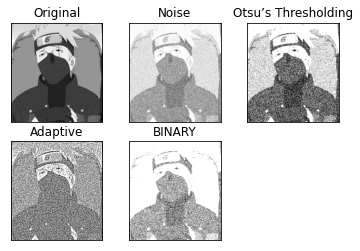

In [156]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

imgs = [img_origin, img, threshold, adaptive_threshold, global_threshold] 
titles = ['Original', 'Noise',"Otsu’s Thresholding", 'Adaptive', 'BINARY']

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(imgs[i])
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])
    
plt.show()

Вывод, изходя из результатов работы, наиболее близким к оригиналу является изображение с применением порогового метода Otsu для определения оптимального порогового значения